You are trying to measure a difference in the $K_{D}$ of two proteins binding to a ligand.  From previous experiments, you know that the values of replicate measurements of $K_{D}$ follow a normal distribution with $\sigma = 2\ \mu M$.  How many measurements would you need to make to confidently tell the difference between two proteins with $K_{D} = 10 \mu M$ and $K_{D} = 12 \mu M$?

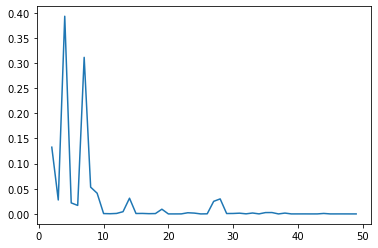

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np
from scipy import stats

replicates = range(2,50)
p_values = []
for i in replicates:
    measure_one = np.random.normal(10,2,i)
    measure_two = np.random.normal(12,2,i)
    
    p_values.append(stats.ttest_ind(measure_one,measure_two)[1])

plt.plot(replicates,p_values)


### Goals
+ Know how to use basic `numpy.random` functions to sample from distributions
+ Begin to understand how to write a simulation to probe possible experimental outcomes




### Create a new notebook with this cell at the top

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

### Figure out how to use `np.random.choice` to simulate 1,000 tosses of a fair coin

In [3]:
# best solution
tosses = np.random.choice([0,1],1000)

In [4]:
# okay solution
tosses = []
for i in range(1000):
    tosses.append(np.random.choice([0,1]))

### np.random uses a "pseudorandom" number generator to simulate choices

+ String of numbers that has the same statistical properties as random numbers
+ Numbers are *actually* generated deterministically

#### Numbers *look* random...

(array([10130., 10188.,  9842., 10102.,  9831.,  9938., 10090.,  9994.,
        10089.,  9796.]),
 array([9.37634353e-06, 1.00007002e-01, 2.00004627e-01, 3.00002253e-01,
        3.99999878e-01, 4.99997504e-01, 5.99995129e-01, 6.99992754e-01,
        7.99990380e-01, 8.99988005e-01, 9.99985631e-01]),
 <a list of 10 Patch objects>)

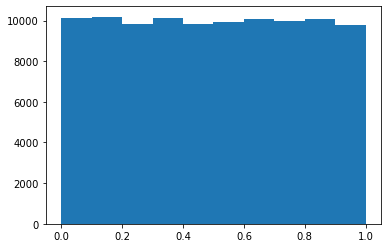

In [5]:
numbers = np.random.random(100000)
plt.hist(numbers)

#### But numbers are *actually* deterministic...

In [6]:
def simple_psuedo_random(current_value,
                         multiplier=13110243,
                         divisor=13132):

    return current_value*multiplier % divisor  

(array([105., 105., 107.,  91.,  93.,  90.,  91., 105., 107., 106.]),
 array([  160. ,  1441.2,  2722.4,  4003.6,  5284.8,  6566. ,  7847.2,
         9128.4, 10409.6, 11690.8, 12972. ]),
 <a list of 10 Patch objects>)

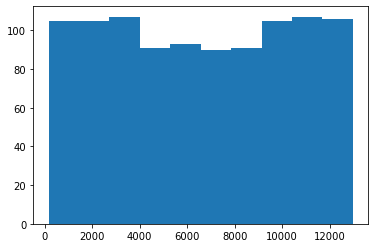

In [7]:
seed = 10218888

out = []
current = seed
for i in range(1000):
    current = simple_psuedo_random(current)
    out.append(current)

plt.hist(out)

### python uses the Mersenne Twister to generate pseudorandom numbers

![mersennetwister](https://upload.wikimedia.org/wikipedia/commons/b/b5/Mersenne_Twister_visualisation.svg)

### What does the `seed` do? 

In [8]:
seed = 1021888

out = []
current = seed
for i in range(1000):
    current = simple_psuedo_random(current)
    out.append(current)


### What will we see if I run this cell twice in a row? 

In [9]:
s1 = np.random.random(10)
print(s1)


[0.03849959 0.49506416 0.29718791 0.65863902 0.62181365 0.51360621
 0.13644128 0.76342386 0.54459614 0.98568953]


### What will we see if I run this cell twice in a row? 

In [10]:
np.random.seed(5235412)
s1 = np.random.random(10)
print(s1)


[0.44616627 0.29423635 0.44965624 0.40469388 0.35328769 0.76140219
 0.15757785 0.69331684 0.31833615 0.94897036]


### A `seed` lets you specify which pseudo-random numbers you will use.  
+ If you use the same seed, you will get identical samples. 
+ If you use a different seed, you will get wildly different samples.

### matplotlib.pyplot.hist

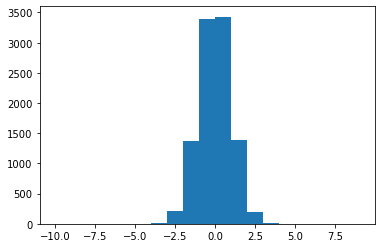

In [11]:
numbers = np.random.normal(size=10000)
counts, bins, junk = plt.hist(numbers,
                              range(-10,10))


#### Basic histogram plotting syntax

```python
COUNTS, BIN_EDGES, GRAPHICS_BIT = plt.hist(ARRAY_TO_BIN,BINS_TO_USE)
```

### Figure out how the function works and report back to the class
+ What the function does
+ Arguments normal people would care about
+ What it returns

In [12]:

np.random.normal     
# returns number(s) drawn from normal distribution.  
# arguments of interest: loc (mean), scale (std deviation), size (number of samples)

np.random.binomial
# returns number(s) drawn from binomial distribution.  
# arguments of interest: n, p (parameters for binomial), size (number of samples)

np.random.uniform
# returns number(s) drawn from uniform distribution.  
# arguments of interest: low (lowest possible number), high (highest possible number),  size (number of samples)

np.random.poisson
# returns number(s) drawn from a poission distribution
# arguments of interest: lam (lambda), size (number of samples)

np.random.choice
# chooses a random number from a list or array
# arguments of interest: a (array), size (number to draw), replace (whether or not to draw with replacement), p (weighted probability of each entry in array)

np.random.shuffle
# shuffle the order of entries in an array
# it does not return anything, just changes the array in place.  This means:
# a = np.array([1,2,3])
# np.random.shuffle(a)
# print(a) --> [3,1,2]

<function RandomState.shuffle>

#### Calculate:
+ 1000 random samples from a normal distribution with a mean of 5 and a standard deviation of 2. 
+ Create a histogram with a bin size of 1. 

-15 0.0
-14 0.0
-13 0.0
-12 0.0
-11 0.0
-10 0.0
-9 0.0
-8 0.0
-7 0.0
-6 0.0
-5 0.0
-4 0.0
-3 0.0
-2 2.0
-1 6.0
0 14.0
1 44.0
2 82.0
3 159.0
4 211.0
5 210.0
6 139.0
7 76.0
8 38.0
9 16.0
10 2.0
11 1.0
12 0.0
13 0.0


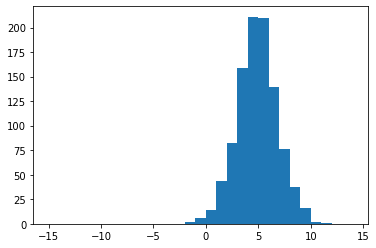

In [13]:
x = np.random.normal(5,2,size=1000)
counts, edges, _ = plt.hist(x,bins=range(-15,15))
for i in range(len(counts)):
    print(edges[i],counts[i])